In [1]:
# =============================================================================
# 05_COMPARACIÓN DE MODELOS
# Evaluación y selección del mejor modelo
# =============================================================================

# 1. Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Añadir el directorio raíz del proyecto al path
sys.path.append(str(Path.cwd().parent))

# Importar configuración
from src import config

# Para métricas y modelos
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import tensorflow as tf
from tensorflow import keras

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


In [2]:
# =============================================================================
# 2. Cargar los datos de prueba (preprocesados)
# =============================================================================
# Datos para modelo binario
X_test_bin = np.load(config.PROCESSED_DATA_DIR / 'X_test_bin.npy')
y_test_bin = np.load(config.PROCESSED_DATA_DIR / 'y_test_bin.npy')

# Datos para modelo multiclase (etiquetas enteras)
X_test_multi = np.load(config.PROCESSED_DATA_DIR / 'X_test_multi.npy')
y_test_multi = np.load(config.PROCESSED_DATA_DIR / 'y_test_multi.npy')

# Convertir a one-hot para evaluación
from tensorflow.keras.utils import to_categorical
y_test_multi_onehot = to_categorical(y_test_multi, num_classes=4)

print("Datos de prueba cargados:")
print(f"  Binario: X_test {X_test_bin.shape}, y_test {y_test_bin.shape}")
print(f"  Multiclase: X_test {X_test_multi.shape}, y_test {y_test_multi.shape} (one-hot: {y_test_multi_onehot.shape})")

Datos de prueba cargados:
  Binario: X_test (200, 20), y_test (200,)
  Multiclase: X_test (200, 20), y_test (200,) (one-hot: (200, 4))


In [3]:
# =============================================================================
# 3. Cargar los modelos entrenados
# =============================================================================
# Modelo binario
binary_model = keras.models.load_model(config.BINARY_MODEL_PATH)
print("Modelo binario cargado desde:", config.BINARY_MODEL_PATH)

# Modelo multiclase
multiclass_model = keras.models.load_model(config.MULTICLASS_MODEL_PATH)
print("Modelo multiclase cargado desde:", config.MULTICLASS_MODEL_PATH)

Modelo binario cargado desde: C:\Users\ferna\Music\ProyectoA_RiesgoCrediticio_Oficial\models\binary_model.h5
Modelo multiclase cargado desde: C:\Users\ferna\Music\ProyectoA_RiesgoCrediticio_Oficial\models\multiclass_model.keras



EVALUACIÓN DEL MODELO BINARIO
Loss: 0.5194
Accuracy: 0.7450
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Classification Report (Binario):
              precision    recall  f1-score   support

        Good       0.76      0.93      0.84       140
         Bad       0.66      0.32      0.43        60

    accuracy                           0.74       200
   macro avg       0.71      0.62      0.63       200
weighted avg       0.73      0.74      0.71       200



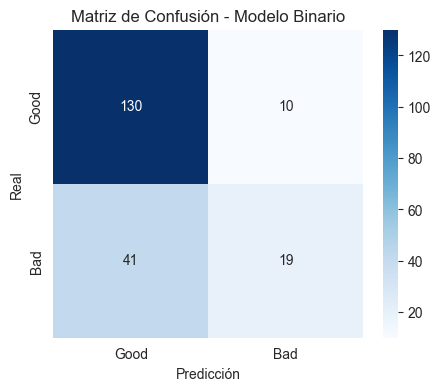

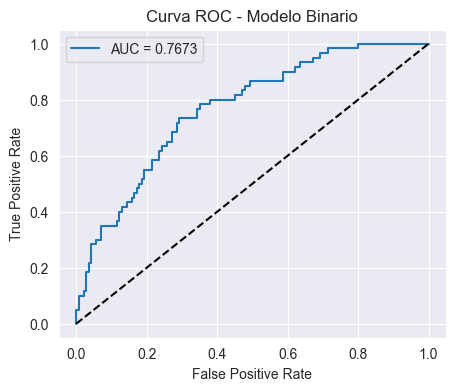

AUC: 0.7673


In [4]:
# =============================================================================
# 4. Evaluación del modelo binario
# =============================================================================
print("\n" + "="*60)
print("EVALUACIÓN DEL MODELO BINARIO")
print("="*60)

# Pérdida y precisión
loss_bin, acc_bin = binary_model.evaluate(X_test_bin, y_test_bin, verbose=0)
print(f"Loss: {loss_bin:.4f}")
print(f"Accuracy: {acc_bin:.4f}")

# Predicciones
y_pred_prob_bin = binary_model.predict(X_test_bin).flatten()
y_pred_bin = (y_pred_prob_bin > 0.5).astype(int)

# Classification report
print("\nClassification Report (Binario):")
print(classification_report(y_test_bin, y_pred_bin, target_names=['Good', 'Bad']))

# Matriz de confusión
cm_bin = confusion_matrix(y_test_bin, y_pred_bin)
plt.figure(figsize=(5,4))
sns.heatmap(cm_bin, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
plt.title('Matriz de Confusión - Modelo Binario')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Curva ROC y AUC
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_prob_bin)
auc = roc_auc_score(y_test_bin, y_pred_prob_bin)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Modelo Binario')
plt.legend()
plt.show()
print(f"AUC: {auc:.4f}")


EVALUACIÓN DEL MODELO MULTICLASE
Loss: 0.3761
Accuracy: 0.8450
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step

Classification Report (Multiclase):
              precision    recall  f1-score   support

        Bajo       0.83      0.83      0.83        35
       Medio       0.93      0.89      0.91       124
        Alto       0.67      0.81      0.73        32
     Crítico       0.50      0.44      0.47         9

    accuracy                           0.84       200
   macro avg       0.73      0.74      0.74       200
weighted avg       0.85      0.84      0.85       200



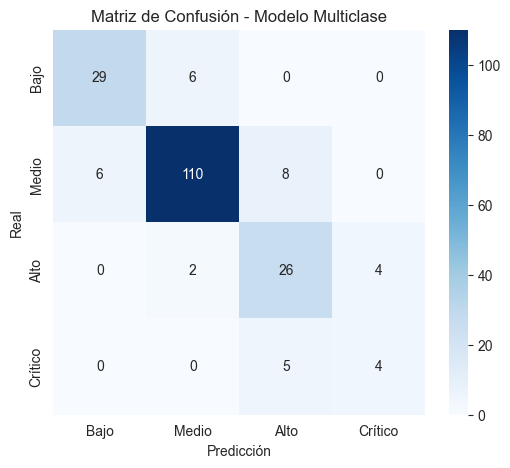

In [5]:
# =============================================================================
# 5. Evaluación del modelo multiclase
# =============================================================================
print("\n" + "="*60)
print("EVALUACIÓN DEL MODELO MULTICLASE")
print("="*60)

# Usar la versión one-hot para evaluate
loss_multi, acc_multi = multiclass_model.evaluate(X_test_multi, y_test_multi_onehot, verbose=0)
print(f"Loss: {loss_multi:.4f}")
print(f"Accuracy: {acc_multi:.4f}")

# Predicciones (para métricas usamos las etiquetas enteras)
y_pred_prob_multi = multiclass_model.predict(X_test_multi)
y_pred_multi = np.argmax(y_pred_prob_multi, axis=1)

# Classification report
print("\nClassification Report (Multiclase):")
print(classification_report(y_test_multi, y_pred_multi, target_names=config.RISK_LEVELS))

# Matriz de confusión
cm_multi = confusion_matrix(y_test_multi, y_pred_multi)
plt.figure(figsize=(6,5))
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues',
            xticklabels=config.RISK_LEVELS, yticklabels=config.RISK_LEVELS)
plt.title('Matriz de Confusión - Modelo Multiclase')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


COMPARACIÓN DE MÉTRICAS
    Modelo  Accuracy     Loss       AUC
   Binario     0.745 0.519365  0.767262
Multiclase     0.845 0.376143         -


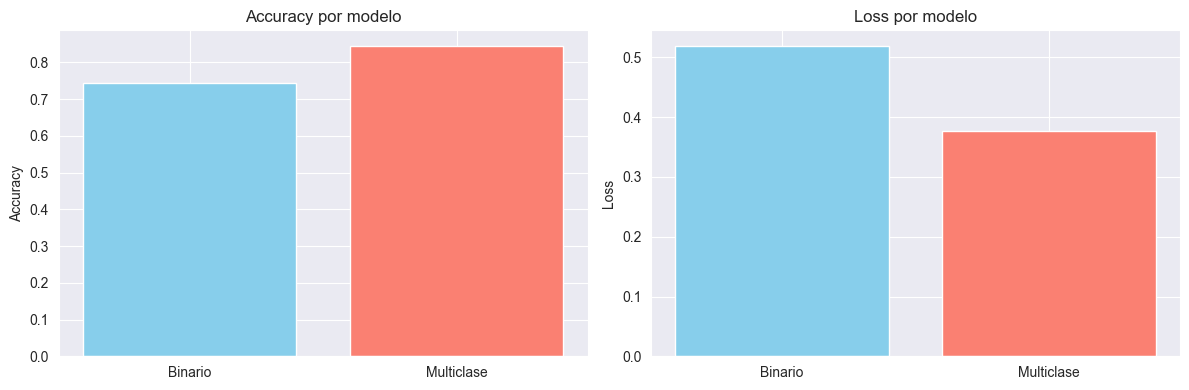

In [6]:
# =============================================================================
# 6. Comparación de métricas principales
# =============================================================================
print("\n" + "="*60)
print("COMPARACIÓN DE MÉTRICAS")
print("="*60)

# Crear DataFrame comparativo
comparison = pd.DataFrame({
    'Modelo': ['Binario', 'Multiclase'],
    'Accuracy': [acc_bin, acc_multi],
    'Loss': [loss_bin, loss_multi]
})

# Para el binario, añadir AUC
comparison['AUC'] = [auc, '-']

print(comparison.to_string(index=False))

# Si se desea, se puede mostrar gráficamente
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].bar(comparison['Modelo'], comparison['Accuracy'], color=['skyblue', 'salmon'])
axes[0].set_title('Accuracy por modelo')
axes[0].set_ylabel('Accuracy')

axes[1].bar(comparison['Modelo'], comparison['Loss'], color=['skyblue', 'salmon'])
axes[1].set_title('Loss por modelo')
axes[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

In [7]:
# =============================================================================
# 7. Conclusiones y selección del mejor modelo
# =============================================================================
print("\n" + "="*60)
print("CONCLUSIONES")
print("="*60)

# Aquí puedes escribir un análisis basado en los resultados obtenidos.
# Por ejemplo:
print("""
El modelo binario alcanza una accuracy de {:.2f}% y un AUC de {:.3f}, lo que indica un buen poder discriminativo entre clientes buenos y malos.
El modelo multiclase logra una accuracy de {:.2f}% en la clasificación de cuatro niveles de riesgo, con un desempeño razonable en todas las clases.

En términos de negocio, el modelo binario puede ser más útil para decisiones de aprobación/rechazo simples, mientras que el modelo multiclase permite una segmentación más fina del riesgo, facilitando estrategias diferenciadas (por ejemplo, tasas de interés variables).

Se recomienda:
- Usar el modelo binario para decisiones automáticas de aprobación.
- Usar el modelo multiclase para análisis de cartera y asignación de tasas.

""".format(acc_bin*100, auc, acc_multi*100))


CONCLUSIONES

El modelo binario alcanza una accuracy de 74.50% y un AUC de 0.767, lo que indica un buen poder discriminativo entre clientes buenos y malos.
El modelo multiclase logra una accuracy de 84.50% en la clasificación de cuatro niveles de riesgo, con un desempeño razonable en todas las clases.

En términos de negocio, el modelo binario puede ser más útil para decisiones de aprobación/rechazo simples, mientras que el modelo multiclase permite una segmentación más fina del riesgo, facilitando estrategias diferenciadas (por ejemplo, tasas de interés variables).

Se recomienda:
- Usar el modelo binario para decisiones automáticas de aprobación.
- Usar el modelo multiclase para análisis de cartera y asignación de tasas.




In [8]:
# =============================================================================
# 8. (Opcional) Guardar resultados en un archivo de texto o CSV
# =============================================================================
# Guardar el DataFrame de comparación
comparison.to_csv(config.PROCESSED_DATA_DIR / 'model_comparison.csv', index=False)
print("\nResultados guardados en:", config.PROCESSED_DATA_DIR / 'model_comparison.csv')


Resultados guardados en: C:\Users\ferna\Music\ProyectoA_RiesgoCrediticio_Oficial\data\processed\model_comparison.csv
